In [17]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from segmentflow import segment, view
from skimage import color
from stl import mesh
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
img_dir_path = Path('../data/SandComp4_18_22/NoComptiff/')
save_dir_path = Path('../data/SandComp4_18_22/')

Loading images...
--> Images loaded as 3D array:  (50, 50, 50)
Plotting images: [0, 12, 24, 36]


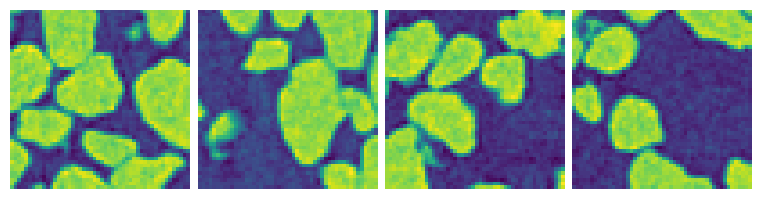

In [7]:
# row & col crop deterined in NB 09
imgs = segment.load_images(
    img_dir_path,
    slice_crop=[125, 175],
    row_crop=[450, 500],
    col_crop=[200, 250],
    convert_to_float=True,
    file_suffix='.tiff'
)
fig, axes = view.plot_slices(
    imgs,
    nslices=4,
    print_slices=True,
    imgs_per_row=None,
    fig_w=7.5,
    dpi=100
)

Binarizing images...
--> Calculating Otsu threshold(s)...
--> Binarization complete.
Plotting images: [0, 12, 24, 36]


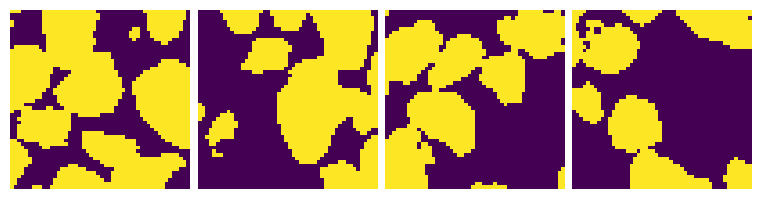

In [4]:
imgs_bw, thresh_vals = segment.binarize_multiotsu(imgs, n_otsu_classes=2)
fig, axes = view.plot_slices(
    imgs_bw,
    nslices=4,
    print_slices=True,
    imgs_per_row=None,
    fig_w=7.5,
    dpi=100
)

Segmenting images...
--> Number of particle(s) before border exclusion:  23
--> Excluding border particles...
--> Segmentation complete. 3 particle(s) segmented.
Plotting images: [0, 12, 24, 36]


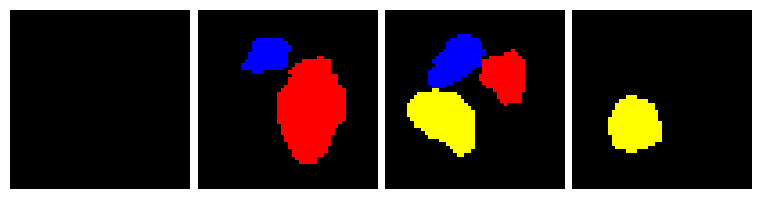

In [5]:
imgs_seg = segment.watershed_segment(
    imgs_bw,
    min_peak_distance=7,
    exclude_borders=True,
    return_dict=False
)
imgs_seg_color = color.label2rgb(imgs_seg)
fig, axes = view.plot_slices(
    imgs_seg_color,
    nslices=4,
    print_slices=True,
    imgs_per_row=None,
    fig_w=7.5,
    dpi=100
)

In [15]:
segment.save_as_stl_files(
    imgs_seg,
    save_dir_path,
    f'{img_dir_path.stem}-',
    make_new_save_dir=True
)

Generating surface meshes...
Meshes not generated. Directory already exists:
C:\Users\cgusb\Research\mhe-analysis\data\SandComp4_18_22\NoComptiff-STLs


In [25]:
stl_dir_path = Path(f'{save_dir_path}/{img_dir_path.stem}-STLs')
stl_dir_list = [path for path in stl_dir_path.glob('*.stl')]
stl_dir_list.sort()
stl_path = stl_dir_list[0]
stl_mesh = mesh.Mesh.from_file(stl_path)
print(stl_mesh.vectors.shape)
print(stl_mesh.vectors[0])
print(stl_mesh.vectors[0, 0])

(5568, 3, 3)
[[32.  21.5  6. ]
 [31.5 22.   6. ]
 [32.  22.   5.5]]
[32.  21.5  6. ]


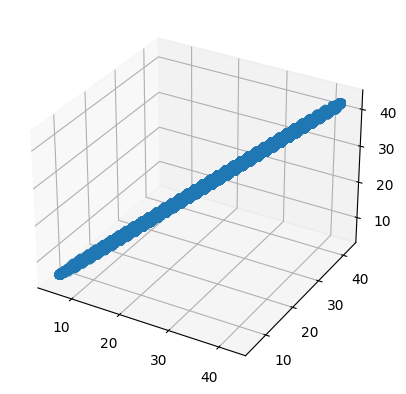

In [24]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(stl_mesh.vectors[:, 0], stl_mesh.vectors[:, 1], stl_mesh.vectors[:, 2], )